![image.png](https://i.imgur.com/a3uAqnb.png)

# Machine Learning with Scikit-Learn - Lab Exercise

In this lab, you'll work with a real dataset to practice the machine learning concepts we covered in class. We'll be predicting house prices using various features.

## Dataset Overview
We're using a simplified version of the California housing dataset. Each row represents a house with features like:
- Average income in the area
- House age
- Average rooms per house
- Population density
- And more...

Your goal: build a model that can predict house prices accurately.

## Step 1: Import Libraries

Fill in the missing imports. You'll need:
- pandas for data manipulation
- numpy for numerical operations  
- matplotlib and seaborn for visualization
- sklearn modules for machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

## Step 2: Load and Explore the Data

In [2]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

# Load the data
housing = fetch_california_housing()

# Create a DataFrame with the features
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable (house prices)
df['price'] = housing.target

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (20640, 9)

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Basic Data Analysis

Let's understand our data better before building models.

In [3]:
# Display basic statistics about the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Check for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


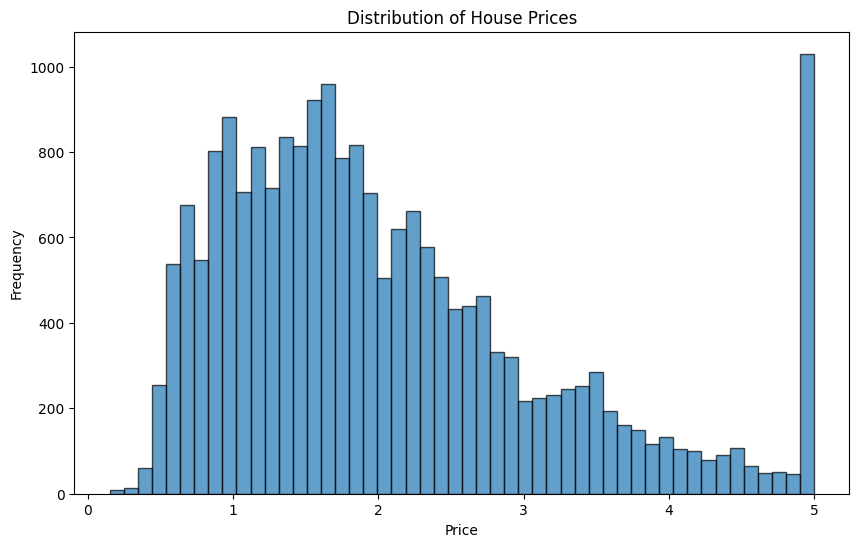

In [5]:
# Create a histogram of house prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Step 4: Feature Analysis

Let's see which features are most correlated with house prices.

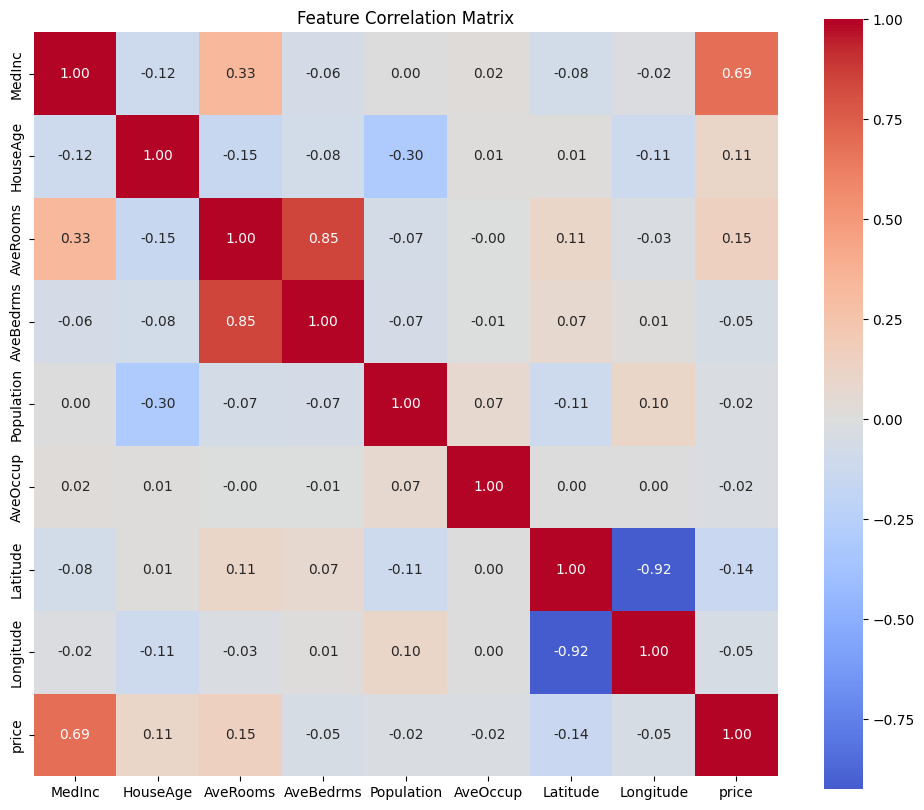

In [6]:
# Create a correlation matrix and visualize it
plt.figure(figsize=(12, 10))

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')

plt.title('Feature Correlation Matrix')
plt.show()

In [7]:
# Show correlations with the target variable (price) in descending order
price_correlations = df.corr()['price'].drop('price').sort_values(ascending=False)
print("Correlations with house price:")
print(price_correlations)

Correlations with house price:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: price, dtype: float64


## Step 5: Prepare Data for Machine Learning

Split the data into features (X) and target (y), then create training and testing sets.

In [8]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (20640, 8)
Target shape: (20640,)


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 16512
Testing set size: 4128


## Step 6: Build and Train Models

We'll compare two different algorithms: Linear Regression and Random Forest.

### Linear Regression Model

In [10]:
# Create and train a Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

print("Linear Regression model trained!")

Linear Regression model trained!


### Random Forest Model

In [11]:
# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained!")

Random Forest model trained!


## Step 7: Make Predictions and Evaluate Models

Let's see how well our models perform on the test data.

In [12]:
# Make predictions with both models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [13]:
# Calculate evaluation metrics for both models

# Linear Regression metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Random Forest metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Model Performance Comparison:")
print(f"\nLinear Regression:")
print(f"  Mean Squared Error: {lr_mse:.4f}")
print(f"  R² Score: {lr_r2:.4f}")

print(f"\nRandom Forest:")
print(f"  Mean Squared Error: {rf_mse:.4f}")
print(f"  R² Score: {rf_r2:.4f}")

Model Performance Comparison:

Linear Regression:
  Mean Squared Error: 0.5559
  R² Score: 0.5758

Random Forest:
  Mean Squared Error: 0.2554
  R² Score: 0.8051


## Step 8: Visualize Results

Create scatter plots to see how well our predictions match the actual prices.

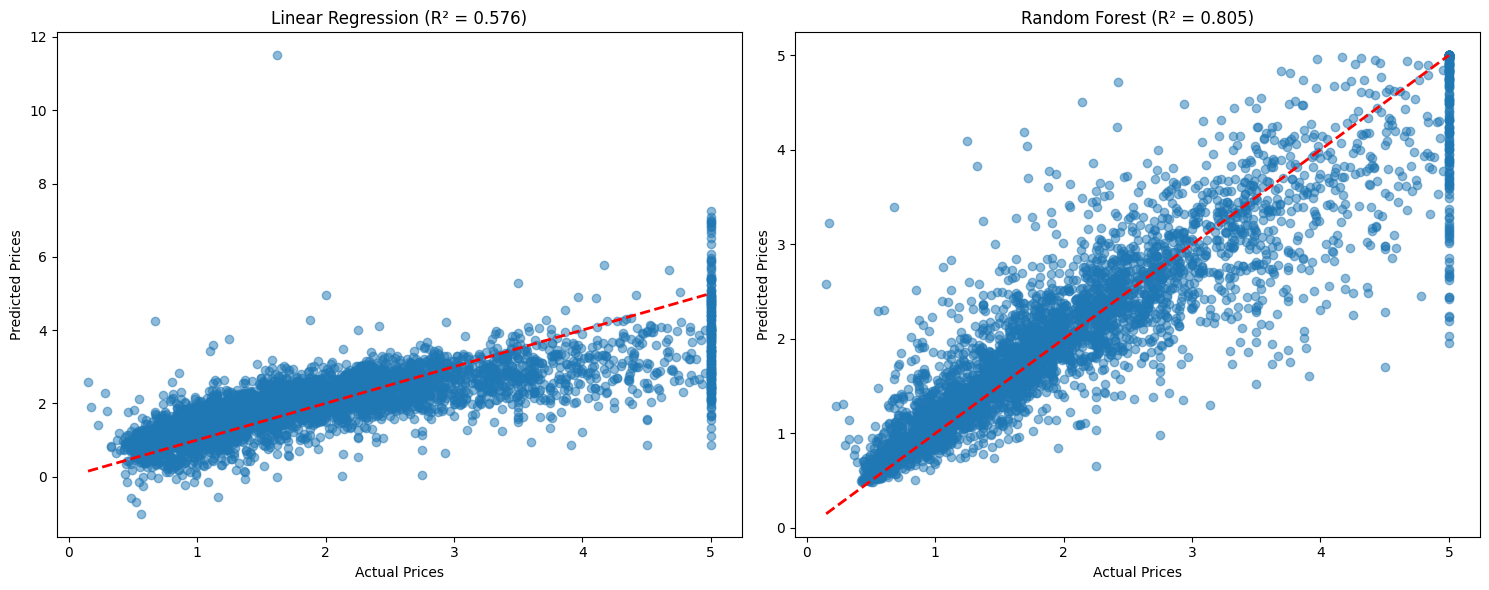

In [14]:
# Create scatter plots comparing predictions vs actual values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression plot
ax1.scatter(y_test, lr_predictions, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Prices')
ax1.set_ylabel('Predicted Prices')
ax1.set_title(f'Linear Regression (R² = {lr_r2:.3f})')

# Random Forest plot
ax2.scatter(y_test, rf_predictions, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Prices')
ax2.set_ylabel('Predicted Prices')
ax2.set_title(f'Random Forest (R² = {rf_r2:.3f})')

plt.tight_layout()
plt.show()

## Step 9: Feature Importance (Bonus)

Random Forest can tell us which features are most important for predictions.

In [15]:
# Get feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

# Sort by importance in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

Feature Importance (Random Forest):
      feature  importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


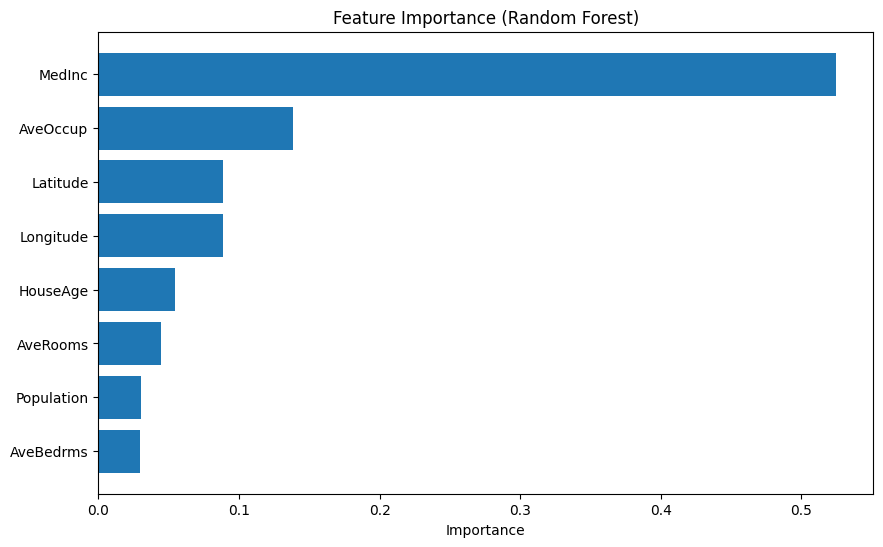

In [16]:
# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

## Questions for Discussion

After completing the exercise, think about these questions:

1. **Which model performed better and why?**
   - Compare the R² scores and MSE values
   - What does this tell you about the relationship between features and house prices?

2. **What do the feature importance scores tell you?**
   - Which features are most important for predicting house prices?
   - Does this make sense from a real-world perspective?

3. **How could you improve the models?**
   - What preprocessing steps might help?
   - What other algorithms could you try?
   - How would you handle overfitting if it occurred?

4. **What patterns do you see in the prediction plots?**
   - Are there price ranges where the models struggle?
   - What might cause these patterns?

## Sample Answers:

**1. Model Performance:**
The Random Forest typically performs better (higher R², lower MSE) because it can capture non-linear relationships and interactions between features that Linear Regression cannot.

**2. Feature Importance:**
Usually MedInc (median income) is the most important feature, followed by location features like Latitude and Longitude. This makes sense - income and location are key factors in real estate prices.

**3. Improvements:**
- Feature scaling for Linear Regression
- Creating new features (e.g., rooms per person)
- Trying other algorithms like XGBoost or Neural Networks
- Cross-validation to better estimate performance

**4. Prediction Patterns:**
Models often struggle with very high-priced houses (the tail of the distribution) because there are fewer training examples in that range.